# **Detect fake profiles in online social networks using Random Forest**

















In this notebook, we have used Random Forest to create a model which assists us to predict fake profiles on online social media platforms.

Table of Contents:


1. About the algorithm and dataset
2. File Uploading and Data Preprocessing

3. Function Definitions

4. Deploying the functions on our Dataset

5. Modeling (Random Forest with Scikit-learn)

6. Evaluation











##1. About the algorithm and Dataset


An attempt to detect fake accounts on the social media platforms is determined by various Machine Learning algorithms. The classification performances of the  classifier Machine Learning algorithm is used for the detection of fake accounts. In this random forest algorithm An attempt is made to classify our data into fake and real profiles.

We going to extract following features from our Dataset:


*   id : User Identifier assigned distinctly to a specific user which is used to identify user apart from rest of the users

*   listed_count : This count shows how many people have added a specific user to a list.

*   favourites_count : Provides the number of times a particular post has been favorited
*   lang_code : The language in which the user interacts with thw GUI of the social media 

*   friends_count : The number of other users which are added to friends list of the specified user
*   followers_count : The number of other users which are added to followers list of the specified user











###Importing the required libraries

In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn import metrics
from sklearn import preprocessing
from  sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


## 2.File Uploading and Data Preprocessing

######function for reading dataset from csv files

In [ ]:
#Loading the dataset
from google.colab import files
uploaded = files.upload()

Saving fusers.csv to fusers.csv
Saving users.csv to users.csv


Function for Data Preprocessing

In [ ]:
def read_datasets():
    """ Reads users profile from csv files """
    genuine_users = pd.read_csv("users.csv")
    fake_users = pd.read_csv("fusers.csv")
    # print genuine_users.columns
    # print genuine_users.describe()
    #print fake_users.describe()
    x=pd.concat([genuine_users,fake_users])   
    y=len(fake_users)*[0] + len(genuine_users)*[1]
    return x,y
    

## 3.Function Definitions

###function for feature engineering 
We extract only the required features from our dataset as mentioned earlier. All the features are converted into integer datatypes.

In [ ]:
def extract_features(x):
    lang_list = list(enumerate(np.unique(x['lang'])))   
    lang_dict = { name : i for i, name in lang_list }             
    x.loc[:,'lang_code'] = x['lang'].map( lambda x: lang_dict[x]).astype(int)    
    feature_columns_to_use = ['id','statuses_count','followers_count','friends_count','lang_code','favourites_count','listed_count']
    x=x.loc[:,feature_columns_to_use]
    return x

###Function for plotting Confusion Matrix
Visualising the prediction results using confusion matrix helps us determine the classifier's accuracy

In [ ]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    target_names=['Fake','Genuine']
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=45)
    plt.yticks(tick_marks, target_names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

###Function For ROC curve
An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters:


*   True Positive Rate
*   False Positive Rate




In [ ]:
def plot_roc_curve(y_test, y_pred):
    false_positive_rate, true_positive_rate, thresholds = sklearn.metrics.roc_curve(y_test, y_pred)

    print("False Positive rate: ",false_positive_rate)
    print("True Positive rate: ",true_positive_rate)

    roc_auc = sklearn.metrics.auc(false_positive_rate, true_positive_rate)

    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate, 'b', label='AUC = %0.2f'% roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.2])
    plt.ylim([-0.1,1.2])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

## 4. Deploying the functions on our Dataset

###Outputing the Pandas Dataframe of our orignal dataset

In [ ]:
print("reading datasets.....\n")
x,y=read_datasets()
x.head()

reading datasets.....



,id,name,screen_name,statuses_count,followers_count,friends_count,favourites_count,listed_count,created_at,url,lang,time_zone,location,default_profile,default_profile_image,geo_enabled,profile_image_url,profile_banner_url,profile_use_background_image,profile_background_image_url_https,profile_text_color,profile_image_url_https,profile_sidebar_border_color,profile_background_tile,profile_sidebar_fill_color,profile_background_image_url,profile_background_color,profile_link_color,utc_offset,protected,verified,description,updated,dataset
0,3610511,Davide Dellacasa,braddd,20370,5470,2385,145,52,Fri Apr 06 10:58:22 +0000 2007,http://braddd.tumblr.com,it,Rome,Roma,NaN,NaN,NaN,http://a0.twimg.com/profile_images/1575057050/...,https://si0.twimg.com/profile_banners/3610511/...,1.0,https://si0.twimg.com/profile_background_image...,0C3E53,https://si0.twimg.com/profile_images/157505705...,F2E195,NaN,FFF7CC,http://a0.twimg.com/profile_background_images/...,BADFCD,FF0000,3600.0,NaN,NaN,Founder of http://www.screenweek.it & http://w...,2/14/2015 10:54,E13
1,5656162,Simone Economo,eKoeS,3131,506,381,9,40,Mon Apr 30 15:08:42 +0000 2007,http://www.lineheight.net/,en,Rome,"Rome, Italy",NaN,NaN,NaN,http://a0.twimg.com/profile_images/1901298312/...,NaN,1.0,https://si0.twimg.com/images/themes/theme1/bg.png,333333,https://si0.twimg.com/profile_images/190129831...,FFFFFF,NaN,DDEEF6,http://a0.twimg.com/images/themes/theme1/bg.png,C0DEED,0084B4,3600.0,NaN,NaN,BSc degree (cum laude) in Computer Engineering...,2/14/2015 10:54,E13
2,5682702,tacone,tacone_,4024,264,87,323,16,Tue May 01 11:53:40 +0000 2007,http://t.co/LKrl1dZE,en,Rome,Internets,NaN,NaN,NaN,http://a0.twimg.com/profile_images/1640620850/...,https://si0.twimg.com/profile_banners/5682702/...,1.0,https://si0.twimg.com/profile_background_image...,666666,https://si0.twimg.com/profile_images/164062085...,181A1E,1.0,0,http://a0.twimg.com/profile_background_images/...,1A1B1F,2FC2EF,3600.0,NaN,NaN,Cogito ergo bestemmio.,2/14/2015 10:54,E13
3,6067292,alesaura,alesstar,40586,640,622,1118,32,Tue May 15 16:55:16 +0000 2007,http://alesstar.wordpress.com/,en,Rome,NaN,NaN,NaN,1.0,http://a0.twimg.com/profile_images/2797534662/...,https://si0.twimg.com/profile_banners/6067292/...,1.0,https://si0.twimg.com/images/themes/theme4/bg.gif,3C3940,https://si0.twimg.com/profile_images/279753466...,FFFFFF,NaN,95E8EC,http://a0.twimg.com/images/themes/theme4/bg.gif,0099B9,0099B9,3600.0,NaN,NaN,"Se la vita ti dà sarde, scapocciale!",2/14/2015 10:54,E13
4,6015122,Angelo,PerDiletto,2016,62,64,13,0,Sun May 13 19:52:00 +0000 2007,http://www.flickr.com/per_diletto,it,Rome,"iPhone: 44.069630,12.569966",NaN,NaN,1.0,http://a0.twimg.com/profile_images/1073412966/...,NaN,1.0,https://si0.twimg.com/images/themes/theme18/bg...,333333,https://si0.twimg.com/profile_images/107341296...,EEEEEE,NaN,F6F6F6,http://a0.twimg.com/images/themes/theme18/bg.gif,ACDED6,38543,3600.0,NaN,NaN,Je me souviens,2/14/2015 10:54,E13


###Outputing the desired Dataframe after feature extraction

In [ ]:
print("extracting features.....\n")
x=extract_features(x)
print(x.columns)
print(x.describe())

extracting features.....

Index(['id', 'statuses_count', 'followers_count', 'friends_count', 'lang_code',
       'favourites_count', 'listed_count'],
      dtype='object')
                 id  statuses_count  ...  favourites_count  listed_count
count  2.818000e+03     2818.000000  ...       2818.000000   2818.000000
mean   5.374889e+08     1672.198368  ...        234.541164      2.818666
std    2.977005e+08     4884.669157  ...       1445.847248     23.480430
min    3.610511e+06        0.000000  ...          0.000000      0.000000
25%    3.620867e+08       35.000000  ...          0.000000      0.000000
50%    6.162253e+08       77.000000  ...          0.000000      0.000000
75%    6.177673e+08     1087.750000  ...         37.000000      1.000000
max    1.391998e+09    79876.000000  ...      44349.000000    744.000000

[8 rows x 7 columns]


### 5.Modeling (Random Forest with Scikit-learn)

We will implement **random forest** or **random decision forest** from Scikit Learn Library in our algorithm. 
Random forests are an ensemble learning method for classification, regression and other tasks that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean/average prediction (regression) of the individual trees. Random decision forests correct the habit of decision trees of overfitting to their training set.

We will initiliaze 'clf' object which will store random forest model in itself and then we will tune parameters like number of learner trees or out of the bag score for that object. Later on the object will be coupled with our train set to implement random foreston our dataset

###Test-Train Split

In [ ]:
print("spliting datasets in train and test dataset...\n")
X_train,X_test,y_train,y_test = train_test_split(x, y, test_size=0.20, random_state=44)

spliting datasets in train and test dataset...



###Feature Scaling the data
Feature Scaling is a technique to standardize the independent features present in the data in a fixed range. If feature scaling is not done, then a machine learning algorithm tends to weigh greater values, higher and consider smaller values as the lower values, regardless of the unit of the values. Feature Scaling is done on the independent features in dataset, i.e. X_train and X_test.

IMP Note: Feature Scaling must always be done **after the test-test split**. The reason for this is that if feature scaling is done before the split then information is leaked inside the model and algorithm can predict values in test set beforehand, which might lead to faulty accuracy results.


In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

###Outputing Feature Scaled Values

In [ ]:
print(X_train)

[[ 2.63963676e-01 -3.34583855e-01 -4.11619131e-02 ... -9.23296640e-01
  -1.58061691e-01 -1.21252536e-01]
 [-1.48481569e+00 -3.35750841e-03  4.71793252e+01 ...  1.08452837e+00
  -1.55337276e-01  3.09416245e+01]
 [-1.56952213e+00  5.26968854e-01 -2.82107904e-02 ... -9.23296640e-01
  -1.54656172e-01 -7.95013574e-02]
 ...
 [-4.66356080e-02 -2.74894318e-01 -2.25446742e-02 ...  1.08452837e+00
  -1.56699483e-01  4.57521791e-02]
 [ 2.82637340e+00 -3.40249303e-01 -4.26651684e-02 ... -9.23296640e-01
  -1.58061691e-01 -1.21252536e-01]
 [ 2.62224944e-01 -3.25681009e-01 -4.05837380e-02 ... -9.23296640e-01
  -1.58061691e-01 -1.21252536e-01]]


In [ ]:
print(X_test)

[[-0.92185072  1.67260329  0.03330704 ...  1.08452837 -0.14580182
   0.33801043]
 [-0.62705246  1.07388688  0.07296986 ...  1.08452837  1.47726833
   0.12925454]
 [-1.54178096  0.0253744  -0.03098603 ...  1.08452837 -0.14580182
  -0.07950136]
 ...
 [ 0.26201651 -0.33316749 -0.04093064 ... -0.92329664 -0.15806169
  -0.12125254]
 [-0.72887819 -0.28136912 -0.03792413 ...  1.08452837 -0.15806169
  -0.12125254]
 [ 0.2659276  -0.33600022 -0.04058374 ... -0.92329664 -0.15806169
  -0.12125254]]


###Training data using Random Forest

In [ ]:
print("training datasets.......\n")
clf=RandomForestClassifier(n_estimators=40,oob_score=True)
trained_model = clf.fit(X_train,y_train)
print("The best classifier is: ",clf)
#Predict 
y_pred = clf.predict(X_test)

training datasets.......

The best classifier is:  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=40,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)


### Classification Accuracies
This helps us determine whether our model is overfitting.


*   Overfitting: Overfitting occurs when our ML model corresponds too closely or exactly to a particular set of data (Train Set in this case), and may therefore fail to fit additional data or predict future observations (Test Set).

We can check overfitting by comparing the classification Accuracy on Train set with that on the Test set. If model performs too well on train set and fails on test set, then this is a certain case of overfitting, but this is not the case over here as you can clearly see.


In [ ]:
print('Classification Accuracy on Train dataset: ' ,sklearn.metrics.accuracy_score(y_train, trained_model.predict(X_train)))
print('Classification Accuracy on Test dataset: ' ,sklearn.metrics.accuracy_score(y_test, y_pred))

Classification Accuracy on Train dataset:  0.9995563442768411
Classification Accuracy on Test dataset:  0.950354609929078


##6. Evaluation

###Confusion Matrix
A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known.

Confusion Matrix without Normalisation

Confusion matrix, without normalization
[[266   2]
 [ 26 270]]


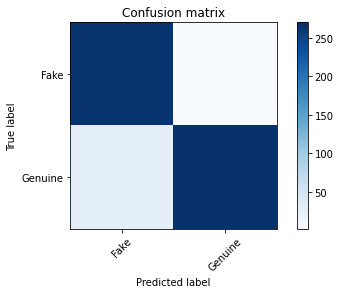

In [ ]:
cm=confusion_matrix(y_test, y_pred)
print('Confusion matrix, without normalization')
print(cm)
plot_confusion_matrix(cm)

Normalized Confusion Matrix

Normalized confusion matrix
[[0.99253731 0.00746269]
 [0.08783784 0.91216216]]


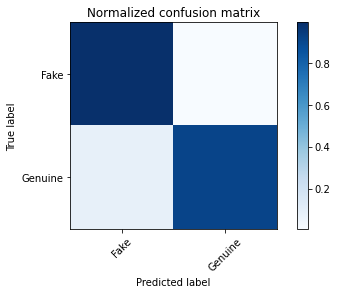

In [ ]:
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

###Classification Report

In [ ]:
print(sklearn.metrics.classification_report(y_test, y_pred, target_names=['Fake','Genuine']))

              precision    recall  f1-score   support

        Fake       0.91      0.99      0.95       268
     Genuine       0.99      0.91      0.95       296

    accuracy                           0.95       564
   macro avg       0.95      0.95      0.95       564
weighted avg       0.95      0.95      0.95       564



Based on the count of each section, we can calculate precision and recall of each label:

• **Precision** is a measure of the accuracy provided that a class label has been predicted. It is defined by precision = TP/(TP + FP)

• **Recall** is true positive rate. It is defined as Recall = TP / (TP + FN)

So, we can calculate precision and recall of each class

F1 score: Now we are in the position to calculate the F1 scores for each label based on the precision and recall of that label

The F1 score is the harmonic average of the precision and recall, where an F1 score reaches its best value at 1 (perfect precision and recall) and worst at 0.it is a good way to show that a classifer has a good value for both recall and precision And finally we can tell the average accuracy for this classifier is the average of the F1-score for both labels, which is 0.95 in our case

###ROC (Receiver operating characteristic) Curve

An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters: True Positive Rate. False Positive Rate.
 
ROC curves typically feature true positive rate on the Y axis, and false positive rate on the X axis. This means that the top left corner of the plot is the “ideal” point - a false positive rate of zero, and a true positive rate of one. This is not very realistic, but it does mean that a larger area under the curve (AUC) is usually better. 

For better Understanding of ROC Curves:
https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html?highlight=roc%20curve

False Positive rate:  [0.         0.00746269 1.        ]
True Positive rate:  [0.         0.91216216 1.        ]


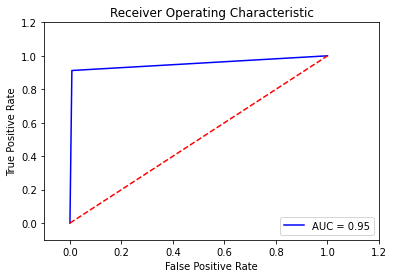

In [ ]:
plot_roc_curve(y_test, y_pred)

###Comparing Test-Train Accuracies on Bar Graphs
We have created Bar Graph plots to visualise and compare classification Accuracy on Train set with that on the Test set. Bar Graphs have been created using Matplotlib and we can cross verify overfitting once again over here.

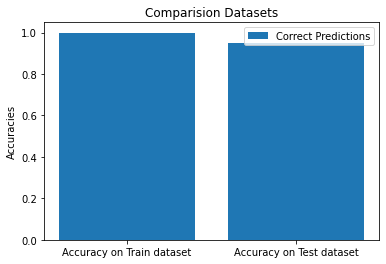

In [ ]:
accuracy_model=['Accuracy on Train dataset','Accuracy on Test dataset']
accuracy=[sklearn.metrics.accuracy_score(y_train, trained_model.predict(X_train)),sklearn.metrics.accuracy_score(y_test, y_pred)]

xpos = np.arange(len(accuracy_model))
plt.bar(xpos,accuracy, label="Correct Predictions")

plt.xticks(xpos,accuracy_model)
plt.ylabel("Accuracies")
plt.title('Comparision Datasets')
plt.legend()